# Assignment 06: 1D Motion with linear drag via the Euler Method
## Due: Tuesday, April 7, 2020 by 17:00
### Tags: Euler, euler method, linear drag, Stokes Law, laminar flow

## Euler Method
In class, we discussed the Euler method. This method is the simplest way to solve  
a first order differential equation. The general idea is that the the Euler method  
takes the state of some dynamical system and estimates (i.e. computes) the next  
state by using the rate of change at the beginning of the time interval to propagate  
forward in time. 

To solve some system, we need to know the differential equation governing the behavior,  
so we need to do some theoretical thinking/modeling and then, once we write down the  
differential equation, we can use the Euler method to solve the system. 

### Example: Linear drag
Let's use a specific example to illustate the method. We'll consider an example which  
only really works well for small velocities, where the drag force is roughly linear  
in velocity (this is called Stokes' Law, and can be exactly calculated for a sphere;  
but not for general shapes). Consider a ball of mass $m$ thrown upward from initial  
height $y_0$ with initial upward speed $v_0$ as show in the figure below:

<img src="1d_motion.svg" width="400" align="center"/>

To model the system, we use Newton's second law to write
$$ \sum F_y = m a_y,$$
or, since $a_y = dv/dt$, we have, with the ball moving upward:
$$ - mg - bv = m\frac{dv}{dt}.$$
Now dividing both sides by $m$ and rearranging:
$$\frac{dv}{dt} = -\left(g + \frac{b}{m} v\right) $$
The differential equation governing the vertical motion is simply obtained via
$$ \frac{dy}{dt} = v $$.
The above two equations constitute the necessary theoretical model for our system.  
Now we use the Euler method to compute an approximate solution to the set of  
differential equations. We first replace $dv / dt$ with $\Delta v / \Delta t$, and  
$dy / dy$ with $\Delta y / \Delta t$ and to obtain two equations: 
$$ \Delta v =  -\left(g + \frac{b}{m} v\right)\, \Delta t$$
$$ \Delta y =  v\,\Delta t$$
where I have multiplied each equation by $\Delta t$ to eliminate the fraction.  
These two equations tell us how to compute the change in $v$ and in $y$ at any instant   
in time. Hence, if we know the position nd velocity at time time $t_n$, then the values  
at the next time stem are

\begin{equation}
v\left ( t_{n+1}\right) = v\left( t_n\right) -\left(g + \frac{b}{m} v\left(t_n\right)\right)\, \Delta t
\end{equation}

\begin{equation}
y(t_{n+1})  = y(t_n) + v(t_n)\,\Delta t 
\end{equation}
These two equations show how to implement the Euler method for this problem.  
Note that the new values for the position and velocity depend soley on their  
values in the previous time step. Furthermore, the term
\begin{equation}
-\left(g + \frac{b}{m} v\left(t_n\right)\right)
\end{equation}
is just the derivative of velocity with respect to time, so you can think of  
the first of the two equations as 
\begin{equation}
v\left ( t_{n+1}\right) = v\left( t_n\right) + \frac{dv}{dt} \Delta t
\end{equation}

## Part 1: Implement the Euler Method
Your task here is to implement the Euler method for a mass  
in vertical motion (we haven't yet thought through how to do a 2D problem, but we will!). 

Assume that the mass $m$ starts at initial position $y_0$ with inititial upward velocity $v_0$. The one physical parameter you need to do this simulation is the value of $b/m$. For now, let's imagine this parameter can take on values from zero (i.e. no drag) and larger. In the course of testing your code, you absolutely should make sure that if you set $b/m$ to zero, that you recover the behavior for one-dimensional motion without air resistance.

In the cell below, compose a **well-documented function** which computes the derivative 
\begin{equation}
\frac{dv}{dt} =  -\left(g + \frac{b}{m} v\left(t_n\right)\right)
\end{equation}
call the function (for obvious reasons) dvdt and let it's arguments be $v$, b_over_m, and $g$.
Make $g$ be a default argument with the value $9.8\;\mathrm{m/s}^2$.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
plt.style.use('dark_background')
plt.rc('text', usetex=True)
plt.rcParams["figure.figsize"] = (10,8)

In [2]:
def dvdt(vy, b_over_m = 0.01, g = 9.80):
    """
    This function returns the change in velocity with respect to time,
    given the variables velocity(v), only in the y direction, the constant of beta divided by
    the object's mass (b_over_m), and the constant of earth-acceleration(g) 
    """    
    return -(g + b_over_m * vy )

Now using this function, create a single code cell which runs the simulation as long as the vertical position of the mass is above $y = 0$. 

In [3]:
def plot_sim(t, v, y, v0, y0, bm, save_fig=False):
    fig = plt.figure()
    ax = fig.add_subplot(211)
    
    plt.plot(t,v, linewidth=1, alpha=1, color='C0')
    plt.ylabel('vertical velocity (m/s)', {'color': 'C0', 'fontsize': 22})

    plt.grid(color='g', linestyle='-', linewidth=0.75, alpha = 0.5)
    plt.tick_params(axis='both', which='major', labelsize=16)
    plt.text(0.75, 0.90,'$y_0 = $ %.2f m' % (y0), fontsize=18, transform=ax.transAxes)
    plt.text(0.75,0.80,'$v_0 = $ %.2f m/s' % (v0), fontsize=18, transform=ax.transAxes)
    plt.text(0.75,0.70,'$b/m = $ %.2f' %(bm), fontsize=18, transform=ax.transAxes)

    ax = fig.add_subplot(212)
    plt.plot(t,y, linewidth=1, alpha=1, color='C0')
    plt.ylabel('position (m)', {'color': 'C0', 'fontsize': 22})
    plt.xlabel('time (s)',{'color': 'C0', 'fontsize': 22} )
    plt.grid(color='g', linestyle='-', linewidth=0.75, alpha = 0.5)
    plt.tick_params(axis='both', which='major', labelsize=16)
    if(save_fig==True): plt.savefig('simPlot.png') 
    plt.show()
    return None

In [4]:
def run_sim(y0, vy0, Δt, b_over_m = 0.01):
    y = [y0]   # sets first value of y to be initial position; y is a list
    vy = [vy0] # sets initial velocity in y direction
    t = [0.0]  # create a list to t; sets the initial time to zero
    
    while y[-1] >= 0:
        vy.append( vy[-1] + dvdt(vy[-1], b_over_m) * Δt )
        y.append( y[-1] + vy[-1] * Δt )
        t.append( t[-1] + Δt )
    plot_sim(t, vy, y, vy0, y0, b_over_m)
    return t, vy, y

## Part 2: Modularizing and testing the method
### Modularizing the simulation
Normally, I would first test the above code, but let's first make the code modular. Turn your simulation code into a single function called run_sim() with arguements $y0$, $v0$, $\Delta t$, and b_over_m. Put this function definition in the cell below:

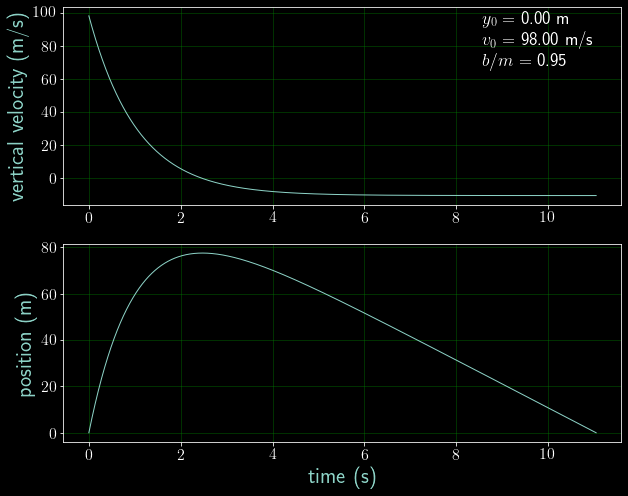

In [5]:
t, v, y = run_sim(0, 98.0, 0.001, b_over_m = 0.95)

### Below, I am isolating the specific time the particle hits the ground, for my later testing:

In [6]:
t[-1]

11.04199999999932

### Testing your simulation code
Now test this code. Whenever you write code to simulate a system, you should test it extensively to insure that the code returns sensible values in cases where you know what the solution should be. In this section, I want to you use markdown and code cells to test your code in at least 4 different situations. Some of your tests should be in the case where there is no air drag, and some should include air drag.

### Test 1: [Assuming No Air Drag]
[The graph should show standard kinematics with a parabolic look:]

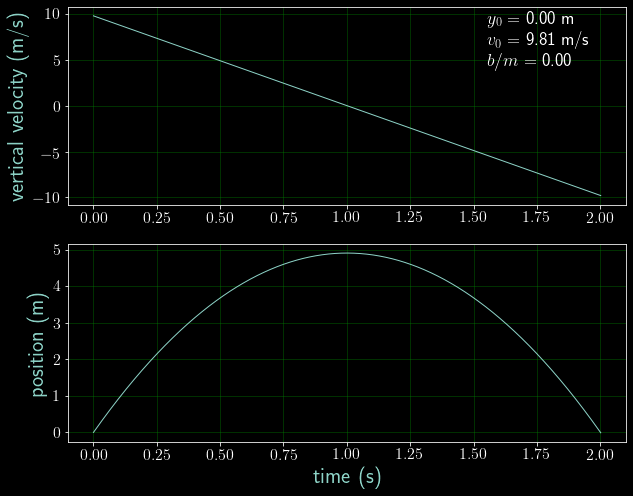

In [7]:
t, v, y = run_sim(0, 9.81, 0.001, b_over_m = 0)

### Here, I test it with the familiar 1d kinematics analytical solution:

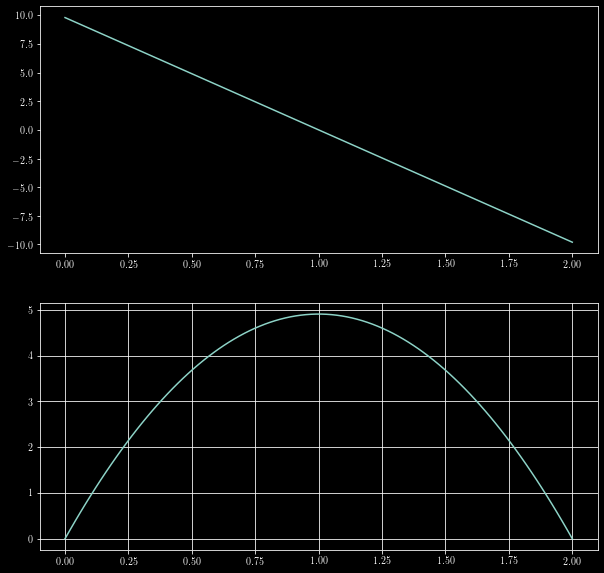

In [8]:
t = np.linspace(0,2,100)

y = 9.81*t-.5*9.81*t**2  # v0t - 0.5gt^2
v = 9.81-9.81*t          # v0 - gt

fig, ax = plt.subplots(2,1,figsize=(10,10))

ax[0].plot(t,v)
ax[1].plot(t,y)
plt.grid()
plt.show()


#### Test 2: [Making b_over_m 1]
[This will allow me to test it analytically with a simple solution for the air drag compnent]

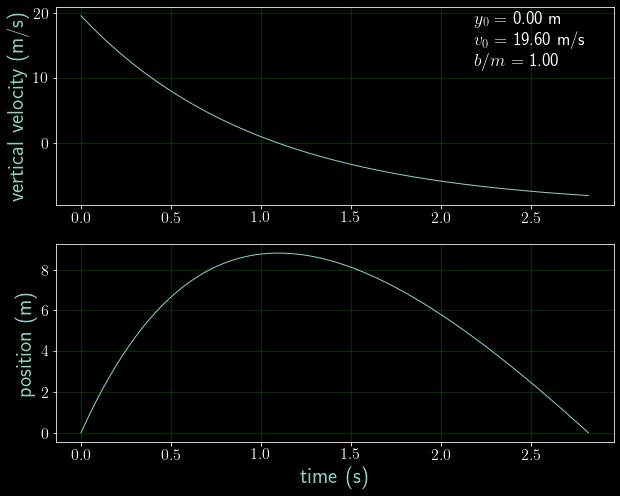

In [9]:
t, v, y = run_sim(0, 19.6, 0.001, b_over_m = 1.00)

### Now, I test this simulation with an analytical solution to our air-drag differential equation, setting b/m = 1:

##### dv/dt = -(g+(b/m)*v)

##### vy = gm/b(1- e^(-(b t)/m)) + v0

##### AND

##### y = gtm/b(1 + m/b(e^(-bt/m))) + v0t

##### and in this case, b/m = 1, so the above equation becomes

##### y = gtm(1+ e^(-t)) + v0t


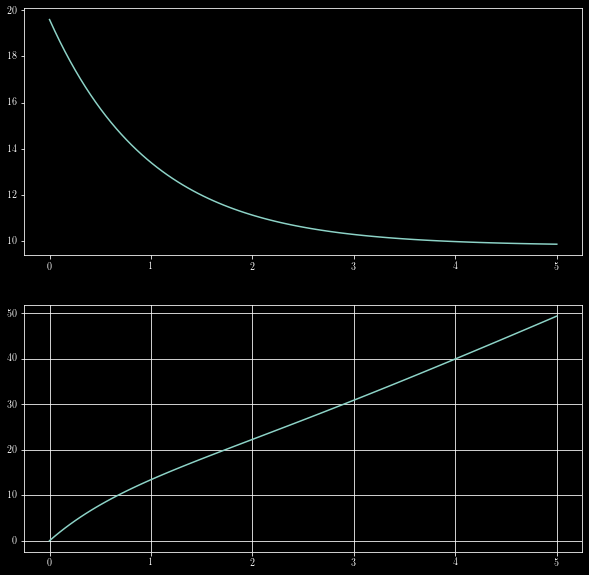

In [25]:
t = np.linspace(0,5,100)
g = -9.80
v0 = 19.60
y3 = g*t*(1 - np.exp(-t)) + v0*t 
v3 = g*(1 - np.exp(-t)) + v0

fig, ax = plt.subplots(2,1,figsize=(10,10))

ax[0].plot(t,v3)
ax[1].plot(t,y3)
plt.grid()
plt.show()

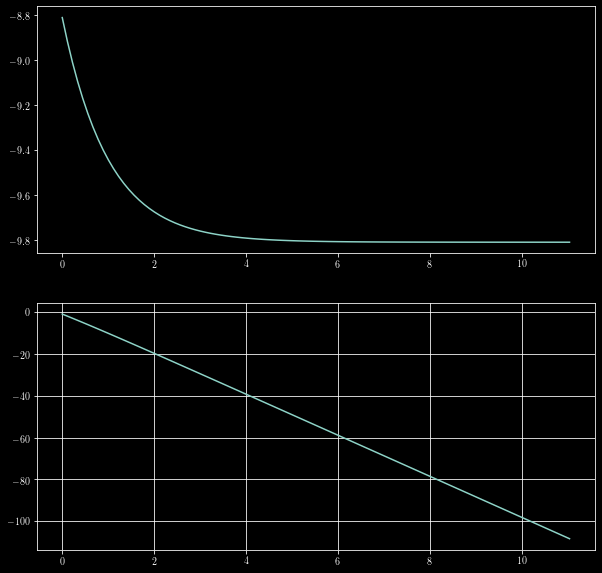

In [24]:
t = np.linspace(0,11.042,100)
c_1 = 1
g = -9.81
y2 = -(c_1)*np.exp(-t) + g*t
v = (c_1)*np.exp(-t) + g

fig, ax = plt.subplots(2,1,figsize=(10,10))

ax[0].plot(t,v)
ax[1].plot(t,y2)
plt.grid()
plt.show()


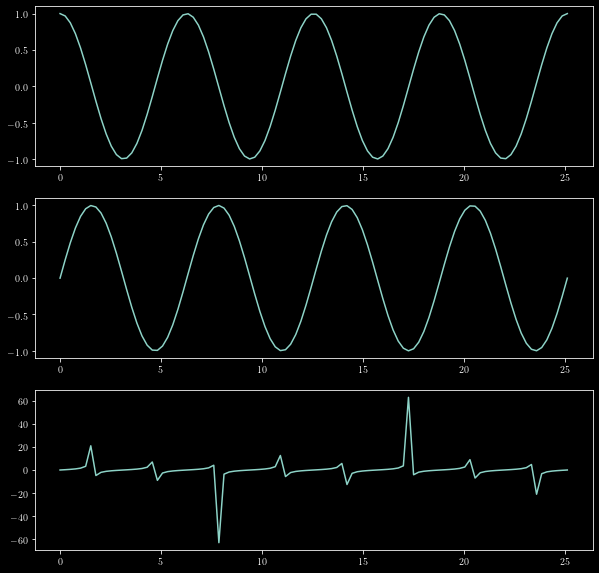

In [13]:
x = np.linspace(0,8*np.pi,100)
y1 = np.cos(x)
y2 = np.sin(x)
y3 = np.tan(x)

fig, ax = plt.subplots(3,1, figsize=(10,10))

ax[0].plot(x,y1)
ax[1].plot(x,y2)
ax[2].plot(x,y3)
plt.show()

(<Figure size 720x720 with 4 Axes>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CBA4B20D88>,
       dtype=object))

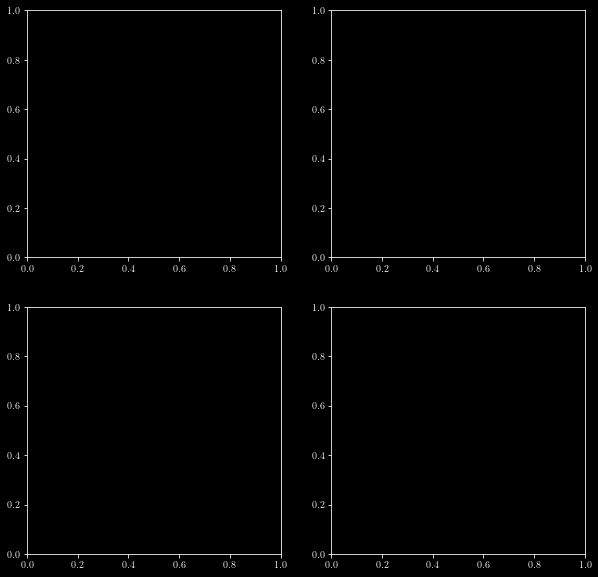

In [10]:
plt.subplots(2,2, figsize=(10,10))